<a href="https://colab.research.google.com/github/Brunokrk/Sigmoidal/blob/main/Aula_002/Aula_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Aula 002

#Séries Temporais - Técnicas de **Forecasting** - Parte 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

sns.set_style()

%config InlineBackend.figure_format = 'svg'

In [5]:
# url do dataset
dataset_path = "https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/electricity_consumption/Electric_Production.csv"

# importar o csv para um dataframe - tudo visto na aula 001
df = pd.read_csv(dataset_path)
df.DATE = pd.to_datetime(df.DATE, format="%m-%d-%Y")
df.set_index('DATE', inplace=True)

# ver as 5 primeiras entradas
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


##1. Naive Approach

Previsão com base na análise do período imediatamente anterior

In [6]:
#dividir entre treino e validação
train = df[df.index <= '2012-8-1']
valid = df[df.index > '2012-8-1']

#crair dataframe para armazenar as previsões

y_hat = valid.copy()

In [8]:
train.iloc[-1].values[0] #ultimo valor de treino

109.8601

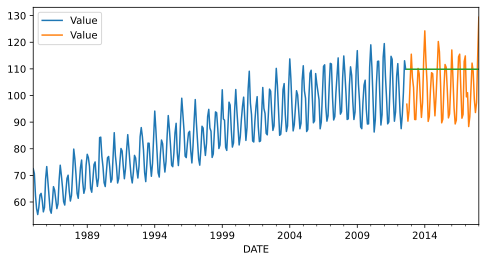

In [11]:
#copiando o ultimo valor do dataset train e atribuindo a y_hat

y_hat['naive'] = train.iloc[-1].values[0]

#plotando train e valid

fig, ax = plt.subplots(figsize=[8,4])
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['naive'].plot(ax=ax)
plt.show()

In [12]:
#Calculando erro da previsão 
print("Erro do Método Naive")
mean_squared_error(y_hat.Value, y_hat.naive, squared = True)

Erro do Método Naive


144.1829082647693

##Média Móvel

Se no Método Naive nós consideramos apenas o último valor disponível, as médias móveis permitem utilizarmos uma janela de intervalo.

Podemos usar não apenas para fazer previsões, como também para suavizar curvas. Quanto maior o intervalo, mais suave as curvas.

In [14]:
train.Value.rolling(7).mean()
#7 primeiros valores com NaN pois não existe nada anterior para comparação

DATE
1985-01-01           NaN
1985-02-01           NaN
1985-03-01           NaN
1985-04-01           NaN
1985-05-01           NaN
                 ...    
2012-04-01     98.280514
2012-05-01     98.623900
2012-06-01     99.671114
2012-07-01    100.486043
2012-08-01    100.185400
Name: Value, Length: 332, dtype: float64

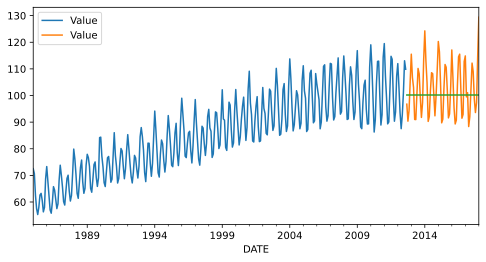

In [15]:
#calcular a média dos ultimos 7 valores disponíveis
y_hat['m7'] = train.Value.rolling(7).mean().iloc[-1]

#plotar train e valid
fig, ax = plt.subplots(figsize=[8,4])
train.plot(ax=ax)
valid.plot(ax=ax)
y_hat['m7'].plot(ax=ax)
plt.show()

In [16]:
#Erro da previsao
mean_squared_error(y_hat.Value, y_hat.m7, squared = True)

101.2125496049239